




# **Atividade 02**

Aluna: Pâmella Geglio


In [1]:
#Este notebook foi feito no Google Colab, antes de iniciar execução é necessário fazer upload do arquivo CarStealing.csv

In [2]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [3]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"
 
# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

In [4]:
# iniciar uma sessão local 
from pyspark.sql import SparkSession
sc = SparkSession.builder.master('local[*]').getOrCreate()
spark = SparkSession(sc)
 
# carregar dados
df_spark = sc.read.csv("CarStealing.csv", inferSchema=True, header=True)
 
# ver algumas informações sobre os tipos de dados de cada coluna
df_spark.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)



In [5]:
#leitura dos 10 primeiros itens para conferência
df_spark.show(10)

+-------+--------------+--------------------+------+--------+----+--------+-------------+----+-----------+------------+
|     ID|          Date| LocationDescription|Arrest|Domestic|Beat|District|CommunityArea|Year|   Latitude|   Longitude|
+-------+--------------+--------------------+------+--------+----+--------+-------------+----+-----------+------------+
|8951354|12/31/12 23:15|              STREET| false|   false| 623|       6|           69|2012|41.75628399|-87.62164472|
|8951141|12/31/12 22:00|              STREET| false|   false|1213|      12|           24|2012|41.89878849|-87.66130317|
|8952745|12/31/12 22:00|RESIDENTIAL YARD ...| false|   false|1622|      16|           11|2012|41.96918578|-87.76766974|
|8952223|12/31/12 22:00|              STREET| false|   false| 724|       7|           67|2012|41.76932868|-87.65772562|
|8951608|12/31/12 21:30|              STREET| false|   false| 211|       2|           35|2012|41.83756759|-87.62176133|
|8950793|12/31/12 20:30|              ST

In [6]:
#visão geral dos dataset
df_spark.describe().show()

+-------+-----------------+-----------+-------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+
|summary|               ID|       Date|LocationDescription|              Beat|          District|     CommunityArea|              Year|           Latitude|          Longitude|
+-------+-----------------+-----------+-------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+
|  count|           191641|     191641|             191641|            191641|            148589|            167038|            191641|             189365|             189365|
|   mean|4968629.484817967|       null|               null|1258.8107711815321|11.817484941279403| 37.99935937733872| 2006.134939809331|   41.8445546727754| -87.67778220407232|
| stddev|2342997.417823284|       null|               null| 702.5304650473086| 6.964973677632938|21.435905434273703|3.52

# **Exercícios**





### 1.	Quantas linhas de dados (observações) estão neste conjunto de dados?

*Há 191641 dados neste dataset*

In [7]:
df_spark.count()

191641

### 2.	Quantas variáveis estão neste conjunto de dados?

*Há 11 variáveis nesse conjunto de dados*

In [8]:
len(df_spark.columns)

11

### 3.	Qual é o valor máximo da variável "ID"? 


*O valor máximo é 9181151*

In [9]:
df_spark.agg({'ID': 'max'}).show()

+-------+
|max(ID)|
+-------+
|9181151|
+-------+



### 4.	Qual é o valor mínimo da variável "Beat"?

*O valor mínimo é 111.*

In [10]:
df_spark.agg({'Beat': 'min'}).show()

+---------+
|min(Beat)|
+---------+
|      111|
+---------+



### 5.	Quantas observações têm valor TRUE na variável Arrest?

*Há 15536 observações com valor true na variável Arrest*

In [11]:
#importando
from pyspark.sql.functions import countDistinct
import pyspark.sql.functions as F
from pyspark.sql.functions import col

In [12]:
df_spark.groupBy("Arrest").agg(countDistinct("ID")).where(col("Arrest")=="true").show()

+------+------------------+
|Arrest|count(DISTINCT ID)|
+------+------------------+
|  true|             15536|
+------+------------------+



### 6.	Quantas observações têm um valor de Descrição de Localização de ALLEY?

*Há 2308 observações com LocationDescription igual a Alley*

In [13]:
df_spark.groupBy("LocationDescription").agg(countDistinct("ID")).where(col("LocationDescription")=="ALLEY").show()

+-------------------+------------------+
|LocationDescription|count(DISTINCT ID)|
+-------------------+------------------+
|              ALLEY|              2308|
+-------------------+------------------+



### 7.	Em que formato estão as entradas na variável Data?

*Estão em formato String*

In [14]:
df_spark.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)



### 8.	Qual é o mês e ano da data mediana no nosso conjunto de dados?

A mediana é Maio de 2006

In [15]:
#calculo da metade dos valores para identificar qual o valor da mediana

In [16]:
metade = df_spark.count()/2
metade


95820.5

In [17]:
#importado
from pyspark.sql.functions import to_date
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

In [18]:
# alterando coluna Date de Atring para Date
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df_spark.withColumn("Date", to_date(F.col("Date"),"MM/dd/yy"))

In [19]:
# importando lit
from pyspark.sql.functions import lit

In [20]:
#criando coluna com o mês para facilitar os calculos
df_with_month = df.withColumn("Month", lit(F.month(df.Date)))
df_with_month.show(5)

+-------+----------+--------------------+------+--------+----+--------+-------------+----+-----------+------------+-----+
|     ID|      Date| LocationDescription|Arrest|Domestic|Beat|District|CommunityArea|Year|   Latitude|   Longitude|Month|
+-------+----------+--------------------+------+--------+----+--------+-------------+----+-----------+------------+-----+
|8951354|2012-12-31|              STREET| false|   false| 623|       6|           69|2012|41.75628399|-87.62164472|   12|
|8951141|2012-12-31|              STREET| false|   false|1213|      12|           24|2012|41.89878849|-87.66130317|   12|
|8952745|2012-12-31|RESIDENTIAL YARD ...| false|   false|1622|      16|           11|2012|41.96918578|-87.76766974|   12|
|8952223|2012-12-31|              STREET| false|   false| 724|       7|           67|2012|41.76932868|-87.65772562|   12|
|8951608|2012-12-31|              STREET| false|   false| 211|       2|           35|2012|41.83756759|-87.62176133|   12|
+-------+----------+----

In [21]:
#agrupando por ano
df_with_month.groupBy("Year").count().orderBy(col("Year")).show(100)

+----+-----+
|Year|count|
+----+-----+
|2001|20669|
|2002|18753|
|2003|16657|
|2004|16862|
|2005|16484|
|2006|16098|
|2007|14280|
|2008|14445|
|2009|12167|
|2010|15497|
|2011|15637|
|2012|14092|
+----+-----+



In [22]:
#agrupando por mês e ano

In [23]:
df_with_month.groupBy("Year","Month").count().orderBy(col("Year"),("Month")).show(100)

+----+-----+-----+
|Year|Month|count|
+----+-----+-----+
|2001|    1| 1517|
|2001|    2| 1273|
|2001|    3| 1542|
|2001|    4| 1500|
|2001|    5| 1500|
|2001|    6| 1665|
|2001|    7| 1952|
|2001|    8| 1795|
|2001|    9| 1972|
|2001|   10| 2291|
|2001|   11| 1869|
|2001|   12| 1793|
|2002|    1| 1628|
|2002|    2| 1434|
|2002|    3| 1609|
|2002|    4| 1556|
|2002|    5| 1511|
|2002|    6| 1430|
|2002|    7| 1744|
|2002|    8| 1714|
|2002|    9| 1576|
|2002|   10| 1683|
|2002|   11| 1515|
|2002|   12| 1353|
|2003|    1| 1308|
|2003|    2| 1157|
|2003|    3| 1335|
|2003|    4| 1415|
|2003|    5| 1429|
|2003|    6| 1383|
|2003|    7| 1458|
|2003|    8| 1437|
|2003|    9| 1466|
|2003|   10| 1411|
|2003|   11| 1415|
|2003|   12| 1443|
|2004|    1| 1323|
|2004|    2| 1272|
|2004|    3| 1448|
|2004|    4| 1437|
|2004|    5| 1441|
|2004|    6| 1448|
|2004|    7| 1482|
|2004|    8| 1457|
|2004|    9| 1361|
|2004|   10| 1387|
|2004|   11| 1376|
|2004|   12| 1430|
|2005|    1| 1292|
|2005|    2|

In [24]:
#Como já fiz o calculo da metade, fui somando por ano até o falor próximo ao resultado esperado, depois somei mês a mês.
#O valor da metade foi atingido em maio de 2005.

### 9.	Em qual dia da semana ocorreu o maior número de roubos de veículos?

*Sexta é o dia que ocorre o maior número de veículos*

In [25]:
#criando coluna com a informação DayOfWeek, sendo 1- Domingo, 2- Segunda, 3 Terça... e conferindo a base
df_day_of_week = df.withColumn("DayOfWeek", lit(F.dayofweek(df.Date)))
df_day_of_week.show(5)

+-------+----------+--------------------+------+--------+----+--------+-------------+----+-----------+------------+---------+
|     ID|      Date| LocationDescription|Arrest|Domestic|Beat|District|CommunityArea|Year|   Latitude|   Longitude|DayOfWeek|
+-------+----------+--------------------+------+--------+----+--------+-------------+----+-----------+------------+---------+
|8951354|2012-12-31|              STREET| false|   false| 623|       6|           69|2012|41.75628399|-87.62164472|        2|
|8951141|2012-12-31|              STREET| false|   false|1213|      12|           24|2012|41.89878849|-87.66130317|        2|
|8952745|2012-12-31|RESIDENTIAL YARD ...| false|   false|1622|      16|           11|2012|41.96918578|-87.76766974|        2|
|8952223|2012-12-31|              STREET| false|   false| 724|       7|           67|2012|41.76932868|-87.65772562|        2|
|8951608|2012-12-31|              STREET| false|   false| 211|       2|           35|2012|41.83756759|-87.62176133|   

In [26]:
# mostrando o dia da semana com maior quantidade de crimes
df_day_of_week.groupBy("DayOfWeek").count().orderBy(col("count").desc()).show(1)

+---------+-----+
|DayOfWeek|count|
+---------+-----+
|        6|29284|
+---------+-----+
only showing top 1 row



### 10.	Qual mês tem o maior número de roubos de veículos para os quais foi feita uma prisão?

*Janeiro é o mês com maior quantidade de crimes para os quais foi feita uma prisão(1435)*

In [27]:
# filtrando 
df_with_month.filter(col("Arrest")=="true").groupBy("Month").count().orderBy(col("count").desc()).show(1)

+-----+-----+
|Month|count|
+-----+-----+
|    1| 1435|
+-----+-----+
only showing top 1 row



### 11.	Em geral, parece que o crime aumenta ou diminui de 2002 a 2012?

*Em geral diminuem*

In [28]:
roubos = df.groupBy("Year").agg(countDistinct("ID").alias("Qtd_Roubos")).orderBy("Year")
roubos.show()

+----+----------+
|Year|Qtd_Roubos|
+----+----------+
|2001|     20669|
|2002|     18753|
|2003|     16657|
|2004|     16862|
|2005|     16484|
|2006|     16098|
|2007|     14280|
|2008|     14445|
|2009|     12167|
|2010|     15497|
|2011|     15637|
|2012|     14092|
+----+----------+



In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
x = roubos.select('Qtd_Roubos').rdd.map(lambda row : row[0]).collect()
y = roubos.select('Year').rdd.map(lambda row : row[0]).collect()

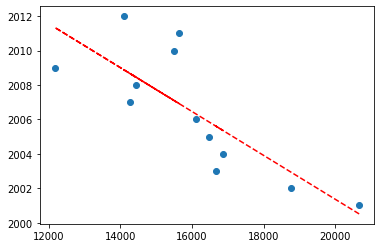

In [31]:
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

In [32]:
# Anotação: outra forma de gerar a tabela
# df.createOrReplaceTempView("TEMP")
# groupDF = spark.sql("SELECT YEAR(Date), count(*) from TEMP group by YEAR(Date) order by YEAR(Date)")
# groupDF.show()

### 12.	Em geral, parece que o crime aumenta ou diminui de 2005 para 2008?

*Tendência de diminuição nesse período*

In [33]:
roubos = df.filter((col("Year")>="2005") & (col("Year")<="2008")).groupBy("Year").agg(countDistinct("ID").alias("Qtd_Roubos")).orderBy("Year")
roubos.show()

+----+----------+
|Year|Qtd_Roubos|
+----+----------+
|2005|     16484|
|2006|     16098|
|2007|     14280|
|2008|     14445|
+----+----------+



In [34]:
x = roubos.select('Qtd_Roubos').rdd.map(lambda row : row[0]).collect()
y = roubos.select('Year').rdd.map(lambda row : row[0]).collect()

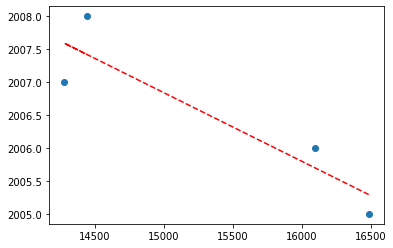

In [35]:
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

### 13.	Em geral, parece que o crime aumenta ou diminui de 2009 para 2011?

*Leve tendência de aumento entre 2009 e 2011*





In [36]:
roubos = df.filter((col("Year")>="2009") & (col("Year")<="2011")).groupBy("Year").agg(countDistinct("ID").alias("Qtd_Roubos")).orderBy("Year")
roubos.show()

+----+----------+
|Year|Qtd_Roubos|
+----+----------+
|2009|     12167|
|2010|     15497|
|2011|     15637|
+----+----------+



In [37]:
x = roubos.select('Qtd_Roubos').rdd.map(lambda row : row[0]).collect()
y = roubos.select('Year').rdd.map(lambda row : row[0]).collect()

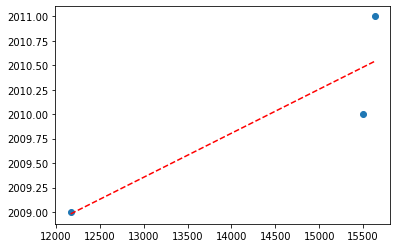

In [38]:
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

### 14.	Parece que houve mais crimes para os quais foram feitas detenções na primeira metade do período de tempo ou na segunda metade do período de tempo? (Observe que o período de tempo é de 2001 a 2012, então o meio do período de tempo é o início de 2007.)

*O primeiro período tem mais prisões que o segundo*

In [39]:
# mostrando total de roubos de outra forma
# df.createOrReplaceTempView("TEMP")
# groupDF = spark.sql("SELECT YEAR(Date), count(*) from TEMP group by YEAR(Date) order by YEAR(Date)")
# groupDF.show()

In [40]:
roubos = df.groupBy("Year").agg(countDistinct("ID").alias(" Qtd_Roubo")).orderBy("Year")
roubos.show()

+----+----------+
|Year| Qtd_Roubo|
+----+----------+
|2001|     20669|
|2002|     18753|
|2003|     16657|
|2004|     16862|
|2005|     16484|
|2006|     16098|
|2007|     14280|
|2008|     14445|
|2009|     12167|
|2010|     15497|
|2011|     15637|
|2012|     14092|
+----+----------+



In [41]:
prisoes = df.filter(col("Arrest")=="true").groupBy("Year").agg(countDistinct("ID").alias("Qtd_Prisoes")).orderBy("Year")
prisoes.show()

+----+-----------+
|Year|Qtd_Prisoes|
+----+-----------+
|2001|       2152|
|2002|       2115|
|2003|       1798|
|2004|       1693|
|2005|       1528|
|2006|       1302|
|2007|       1212|
|2008|       1020|
|2009|        840|
|2010|        701|
|2011|        625|
|2012|        550|
+----+-----------+



### 15.	Para que proporção de roubos de veículos em 2001 foi feita uma prisão?

*Proporção de 10,41%*

In [42]:
# calcula quantidade de prisoes em 2001
qtd_prisoes_2001 = df.select("ID","Arrest","Year").where(col("Arrest")=="true").where(col("Year")=="2001").count()
qtd_prisoes_2001

2152

In [43]:
# calcula total de roubos em 2001
qtd_roubos_2001 = df.select("ID","Arrest","Year").where(col("Year")=="2001").count()
qtd_roubos_2001

20669

In [44]:
# calcula proporção de prisões de 2001
proporcao_prisoes_2001 = qtd_prisoes_2001 / qtd_roubos_2001 * 100
proporcao_prisoes_2001

10.411727708161981

### 16.	Para que proporção de roubos de veículos em 2007 foi feita uma prisão?

*Proporção de 8,48%*

In [45]:
 # calcula quantidade de prisoes em 2007
 qtd_prisoes_2007 = df.select("ID","Arrest","Year").where(col("Arrest")=="true").where(col("Year")=="2007").count()
 qtd_prisoes_2007

1212

In [46]:
 # calcula total de roubos em 2007
 qtd_roubos_2007 = df.select("ID","Arrest","Year").where(col("Year")=="2007").count()
 qtd_roubos_2007

14280

In [47]:
# calcula proporção de prisões de 2007
proporcao_prisoes_2007 = qtd_prisoes_2007 / qtd_roubos_2007 * 100
proporcao_prisoes_2007

8.487394957983193

### 17.	Para que proporção de roubos de veículos em 2012 foi feita uma prisão?

*A proporção é de 8,60%*

In [48]:
# calcula quantidade de prisoes em 2012
qtd_prisoes_2012 = df.select("ID","Arrest","Year").where(col("Arrest")=="true").where(col("Year")=="2012").count()
qtd_prisoes_2012

550

In [49]:
# calcula total de roubos em 2012
qtd_roubos_2012 = df.select("ID","Arrest","Year").where(col("Year")=="2012").count()
qtd_roubos_2012

14092

In [50]:
# calcula proporção de prisões de 2012
proporcao_prisoes_2012 = qtd_prisoes_2007 / qtd_roubos_2012 * 100
proporcao_prisoes_2012

8.60062446778314

### 18.	Quais locais são os cinco principais locais para roubos de veículos, excluindo a categoria "Outros"? 

*Os cinco principais locais são Street, Parking Lot/Garage, Alley, Gas Station e Driveway.*

In [51]:
df.groupBy("LocationDescription").agg(countDistinct("ID")).orderBy(col("count(DISTINCT ID)").desc()).where(col("LocationDescription")!="OTHER").show(5)

+--------------------+------------------+
| LocationDescription|count(DISTINCT ID)|
+--------------------+------------------+
|              STREET|            156564|
|PARKING LOT/GARAG...|             14852|
|               ALLEY|              2308|
|         GAS STATION|              2111|
|DRIVEWAY - RESIDE...|              1675|
+--------------------+------------------+
only showing top 5 rows

